In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
a=pd.read_csv('winequality-red.csv')

In [3]:
a.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
a.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

NO Missing Value.

In [6]:
a['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

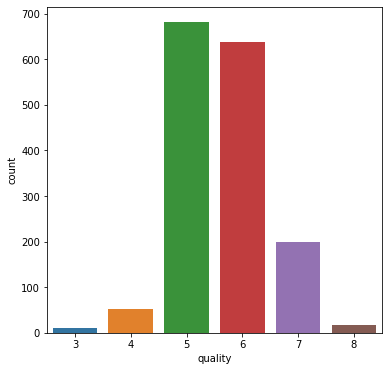

In [7]:
plt.figure(figsize=(6,6))
sns.countplot(data=a, x="quality")
plt.show()

We have 6 quality of wines so we convert into Good and Bad type wine

In [8]:
a['quality']=a['quality'].replace(3,0)

In [9]:
a['quality']=a['quality'].replace(4,0)

In [10]:
a['quality']=a['quality'].replace(5,0)

In [11]:
a['quality']=a['quality'].replace(6,0)

In [12]:
a['quality']=a['quality'].replace(7,1)

In [13]:
a['quality']=a['quality'].replace(8,1)

Quality is Bigger than 6 so we convert into good quality wine.and other are Bad Quality wine.

In [14]:
a['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

[]

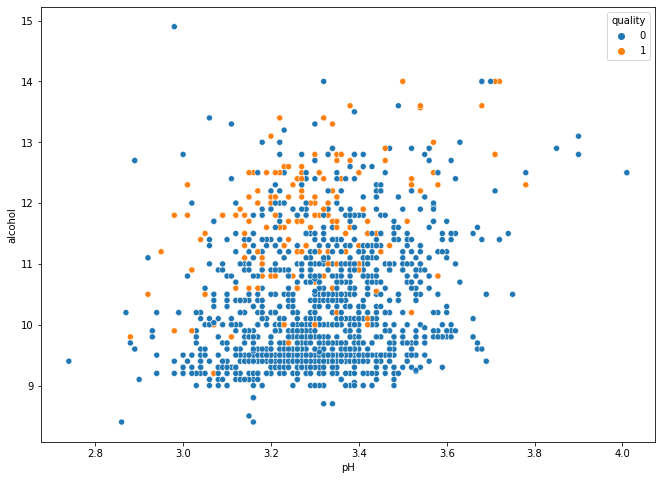

In [30]:
plt.figure(figsize=(11,8))
sns.scatterplot(data=a,x="pH",y="alcohol",hue="quality")
plt.plot()

If alcohol is grester than 12 is mosty the good quality of wine.

# Seperate X and Y

In [16]:
x=a.iloc[:,:-1]
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [17]:
y=a['quality']
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

We have take 25% testing data and 75% training data.

# Import Model

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *

In [20]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
svm=SVC()
dt=DecisionTreeClassifier()



In [21]:
def model(kl):
    kl.fit(xtrain,ytrain)
    ypred=kl.predict(xtest)
    print(classification_report(ytest,ypred))

In [22]:
model(lr)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       355
           1       0.54      0.33      0.41        45

    accuracy                           0.89       400
   macro avg       0.73      0.65      0.68       400
weighted avg       0.88      0.89      0.88       400



In [23]:
model(knn)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       355
           1       0.41      0.33      0.37        45

    accuracy                           0.87       400
   macro avg       0.66      0.64      0.65       400
weighted avg       0.86      0.87      0.86       400



In [24]:
model(svm)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       355
           1       1.00      0.02      0.04        45

    accuracy                           0.89       400
   macro avg       0.94      0.51      0.49       400
weighted avg       0.90      0.89      0.84       400



In [25]:
model(dt)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       355
           1       0.42      0.60      0.50        45

    accuracy                           0.86       400
   macro avg       0.68      0.75      0.71       400
weighted avg       0.89      0.86      0.87       400



# Conclusion

First we have 6 Quality data .
then we converted into two Quality.
dataset is small and the target column has only two categorical data.
we use Logistic regression for that dataset.
Logistic regression give highest Accuracy 89%